## Import libraries

In [1]:
# Import essential libraries for data analysis and visualization
import numpy as np                  
import matplotlib.pylab as plt      
import pandas as pd                 
import awkward as ak                
import uproot                       

import vector                       
vector.register_awkward()           

import requests                     
import os                           
import time                        
import json                         

# Import utility functions from a custom module for handling specific tasks
from geometry import deltar, radial_to_cartesian2d, cartesian_to_radial2d, bound_phi
import dpoa_utilities      
from dpoa_utilities import nanoaod_filenames  
from dpoa_utilities import get_files_for_dataset  
from dpoa_utilities import pretty_print  
from dpoa_utilities import build_lumi_mask  

## Datasets and files

In [2]:
print(nanoaod_filenames.keys())

dict_keys(['Met_collision', 'SingleMuon_collision', 'SingleElectron_collision', 'Z1JetsToNuNu_PtZ-150To250', 'Z1JetsToNuNu_PtZ-250To400', 'Z1JetsToNuNu_PtZ-400ToInf', 'Z2JetsToNuNu_PtZ-150To250', 'Z2JetsToNuNu_PtZ-250To400', 'Z2JetsToNuNu_PtZ-400ToInf'])


In [3]:
# Download these files
for datasetname in nanoaod_filenames.keys():    
    print(datasetname)
    outfilename = f'FILE_LIST_{datasetname}.txt'

    # Remove the file if it exists
    try:
        os.remove(outfilename)
    except OSError:
        pass
        
    for url in nanoaod_filenames[datasetname]:
        print(url)
        r = requests.get(url, allow_redirects=True)
        open(outfilename, 'a').write(r.text)

Met_collision
https://opendata.cern.ch/record/30526/files/CMS_Run2016G_MET_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_1110000_file_index.txt
https://opendata.cern.ch/record/30526/files/CMS_Run2016G_MET_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_270000_file_index.txt
https://opendata.cern.ch/record/30559/files/CMS_Run2016H_MET_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_120000_file_index.txt
https://opendata.cern.ch/record/30559/files/CMS_Run2016H_MET_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_280000_file_index.txt
https://opendata.cern.ch/record/30559/files/CMS_Run2016H_MET_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_70000_file_index.txt
SingleMuon_collision
https://opendata.cern.ch/record/30530/files/CMS_Run2016G_SingleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_130000_file_index.txt
https://opendata.cern.ch/record/30530/files/CMS_Run2016G_SingleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_70000_file_index.txt
https://opendata.cern.ch/record/30563/files/CMS_Run2016H_SingleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1

## Selecting the data

In [4]:
# Retrieve a list of filenames for the dataset "ttsemilep"
filenames = get_files_for_dataset("Z2JetsToNuNu_PtZ-400ToInf", random=True)

print(filenames)

['root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2430000/AC3B83BC-1F39-164D-8F48-E741A150C18B.root\n', 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2520000/D9EBB529-C191-1C4B-8F3C-268A94EC862C.root\n', 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/40000/0A49F822-B7D3-4745-A20A-D5180B26E249.root\n', 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/40000/53CED5E3-E3EB-AD40-B8

In [8]:
# Opening each file in the filenames list
for filename in filenames:
    try:
        # Opening the file with uproot
        f = uproot.open(filename)

        # Verificar se a TTree 'Events' existe
        if "Events" in f:
            # Acessar a TTree 'Events' do arquivo aberto
            events = f["Events"]
        
        # Successful opening of file
        print(f"Successfully opened {filename}")
    
    except Exception as e:
        # If there is an error when opening the file, captures and prints the message
        print(f"Error opening {filename}: {e}")

Successfully opened root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2430000/AC3B83BC-1F39-164D-8F48-E741A150C18B.root

Successfully opened root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2520000/D9EBB529-C191-1C4B-8F3C-268A94EC862C.root

Successfully opened root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/40000/0A49F822-B7D3-4745-A20A-D5180B26E249.root

Successfully opened root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Z2JetsToNuNu_M-50_LHEFilterPtZ-400ToInf_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NA

In [9]:
pretty_print(events.keys(), fmt='40s', require=['HLT_MET75_IsoTrk50'])

HLT_MET75_IsoTrk50                       


## Extract some data

In [10]:
# Jets ---------------------------------------------------
# 4-momentum in pt, eta, phi, mass 
jet_pt = events['Jet_pt'].array()
jet_eta = events['Jet_eta'].array()
jet_phi = events['Jet_phi'].array()
jet_mass = events['Jet_mass'].array()
# jet btag csvv2
jet_btag_csvv2 = events['Jet_btagCSVV2'].array()
#Charged Hadron Energy Fraction
jet_ch_hef = events['Jet_chHEF'].array()

# Muons ---------------------------------------------------
muon_iso = events['Muon_miniIsoId'].array()
muon_tightId = events['Muon_tightId'].array()
muon_pt = events['Muon_pt'].array()
muon_eta = events['Muon_eta'].array()
muon_phi = events['Muon_phi'].array()
muon_mass = events['Muon_mass'].array()

# MET ------------------------------------------------------
met_pt = events['PuppiMET_pt'].array()
met_eta = 0*events['PuppiMET_pt'].array()
met_phi = events['PuppiMET_phi'].array()

calo_met_pt = events['CaloMET_pt'].array() 

# MET (Particle Flow) ------------------------------------------------------
met_pt_pf = events['MET_pt'].array()
met_phi_pf = events['MET_phi'].array()

# Electrons ---------------------------------------------------
electron_pt = events['Electron_pt'].array()
electron_eta = events['Electron_eta'].array()
electron_phi = events['Electron_phi'].array()
electron_mass = events['Electron_mass'].array()

# Taus ---------------------------------------------------
# 4-momentum in pt, eta, phi, mass
tau_pt = events['Tau_pt'].array()         
tau_eta = events['Tau_eta'].array()      
tau_phi = events['Tau_phi'].array()       
tau_mass = events['Tau_mass'].array()   

# Photons ---------------------------------------------------
# 4-momentum in pt, eta, phi, mass
photon_pt = events['Photon_pt'].array()
photon_eta = events['Photon_eta'].array()
photon_phi = events['Photon_phi'].array()
photon_mass = events['Photon_mass'].array()

In [11]:
gen_weights = events['genWeight'].array() 
pileup = events['Pileup_nTrueInt'].array() 

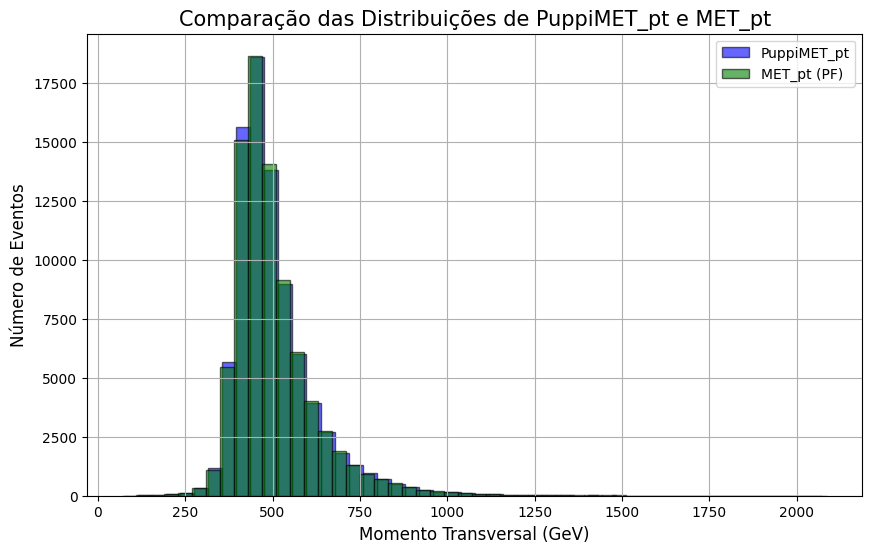

In [12]:
plt.figure(figsize=(10,6))

plt.hist(met_pt, bins=50, color='blue', alpha=0.6, label='PuppiMET_pt', edgecolor='black')

plt.hist(met_pt_pf, bins=50, color='green', alpha=0.6, label='MET_pt (PF)', edgecolor='black')

plt.title('Comparação das Distribuições de PuppiMET_pt e MET_pt', fontsize=15)
plt.xlabel('Momento Transversal (GeV)', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

Integral of PuppiMET_pt: 83149.0
Integral of MET_pt (PF): 83171.0


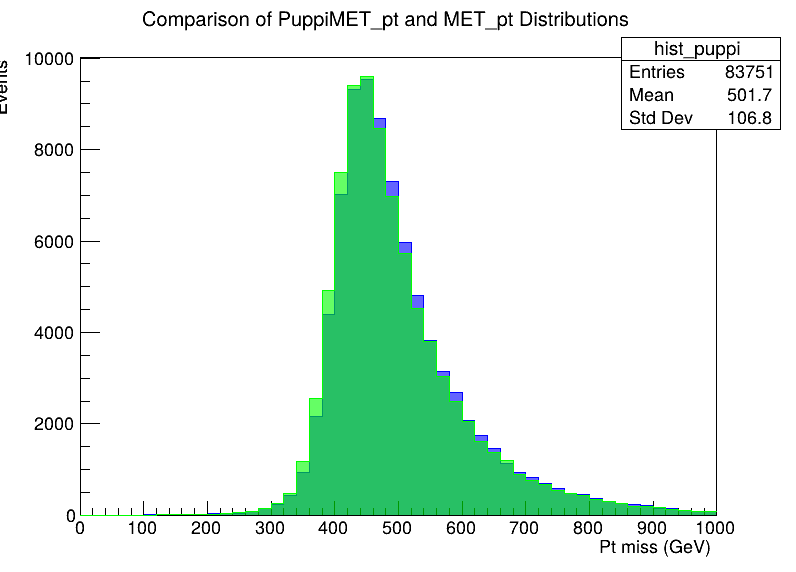

In [13]:
import ROOT

hist_puppi = ROOT.TH1F("hist_puppi", "PuppiMET_pt", 50, 0, 1000)
hist_pf = ROOT.TH1F("hist_pf", "MET_pt (PF)", 50, 0, 1000)

for value in met_pt:
    hist_puppi.Fill(value)

for value in met_pt_pf:
    hist_pf.Fill(value)

integral_puppi = hist_puppi.Integral()
integral_pf = hist_pf.Integral()

print(f"Integral of PuppiMET_pt: {integral_puppi}")
print(f"Integral of MET_pt (PF): {integral_pf}")

hist_puppi.SetLineColor(ROOT.kBlue)
hist_puppi.SetFillColorAlpha(ROOT.kBlue, 0.6)
hist_pf.SetLineColor(ROOT.kGreen)
hist_pf.SetFillColorAlpha(ROOT.kGreen, 0.6)

c = ROOT.TCanvas("c", "PuppiMET_pt and MET_pt", 800, 600)

hist_puppi.Draw("HIST")
hist_pf.Draw("HIST SAME")

hist_puppi.SetTitle("Comparison of PuppiMET_pt and MET_pt Distributions")
hist_puppi.GetXaxis().SetTitle("Pt miss (GeV)")
hist_puppi.GetYaxis().SetTitle("Events")

# Mostrar o gráfico
c.Draw()

## Selections

The Baseline Cut:
1. Pt miss > 200 GeV  
3. (|Pt miss PF - Pt miss Calo| / Pt miss) < 0.5
4. Lead Jet: Pt > 200 GeV and |eta| < 2.4 and 0.1 < Ch. Had. EF < 0.95   
5. Veto Jets: Pt Jet > 40 GeV and Jet |eta| ≥ 2.4   
6. Veto Photon: Pt > 25 GeV and |eta| < 2.5   
7. Medium CSVv2 b-jet veto: Pt > 40 GeV and |eta| < 2.4

The cuts for the Jets + Pt miss region:
Baseline Cut +
1. Veto Muon: Pt  > 10 GeV and |eta| < 2.5
2. Veto Electron: Pt > 10 GeV and |eta| < 2.5 
3. Veto tau: Pt > 20 GeV and |eta| < 2.3  
4. Δϕ(j1, j2, j3, j4), Pt miss) > 0.5

In [14]:
# Lists to store the variables of events that have passed through the cuts
selected_jet_pt = []
selected_jet_eta = []
selected_jet_phi = []
selected_jet_mass = []
selected_jet_btag_csvv2 = []
selected_jet_ch_hef = []

selected_muon_pt = []
selected_muon_eta = []
selected_muon_phi = []
selected_muon_mass = []

selected_met_pt = []
selected_met_phi = []
selected_met_eta = []

selected_calo_met_pt = []

selected_met_pt_pf = []
selected_met_phi_pf = []

selected_electron_pt = []
selected_electron_eta = []
selected_electron_phi = []
selected_electron_mass = []

selected_tau_pt = []
selected_tau_eta = []
selected_tau_phi = []
selected_tau_mass = []

selected_photon_pt = []
selected_photon_eta = []
selected_photon_phi = []
selected_photon_mass = []

# Listas para os 4 lead jets
selected_lead_jet_pt = []
selected_lead_jet_eta = []
selected_lead_jet_phi = []
selected_lead_jet_mass = []
selected_lead_jet_btag_csvv2 = []
selected_lead_jet_ch_hef = []

selected_lead_jet2_pt = []
selected_lead_jet2_eta = []
selected_lead_jet2_phi = []
selected_lead_jet2_mass = []
selected_lead_jet2_btag_csvv2 = []
selected_lead_jet2_ch_hef = []

selected_lead_jet3_pt = []
selected_lead_jet3_eta = []
selected_lead_jet3_phi = []
selected_lead_jet3_mass = []
selected_lead_jet3_btag_csvv2 = []
selected_lead_jet3_ch_hef = []

selected_lead_jet4_pt = []
selected_lead_jet4_eta = []
selected_lead_jet4_phi = []
selected_lead_jet4_mass = []
selected_lead_jet4_btag_csvv2 = []
selected_lead_jet4_ch_hef = []

gen_weights_selected = []
pileup_selected = []

In [15]:
# Calculate the number of jets for all events before the loop
num_jets = ak.num(jet_pt, axis=1)  

#Define the threshold for btag
medium_btag_threshold = 0.8

mask_lumi = build_lumi_mask('Cert_278820-284044_13TeV_Legacy2016_Collisions16GH_JSON.txt', events)

# Triggers of MET 
HLT_PFMET170_NotCleaned = events['HLT_PFMET170_NotCleaned'].array()
HLT_PFMET170_HBHECleaned = events['HLT_PFMET170_HBHECleaned'].array()
HLT_PFMET170_BeamHaloCleaned = events['HLT_PFMET170_BeamHaloCleaned'].array()
HLT_PFMETNoMu110_PFMHTNoMu110_IDTight = events['HLT_PFMETNoMu110_PFMHTNoMu110_IDTight'].array()
HLT_PFMETNoMu120_PFMHTNoMu120_IDTight = events['HLT_PFMETNoMu120_PFMHTNoMu120_IDTight'].array()
HLT_MET75_IsoTrk50 = events['HLT_MET75_IsoTrk50'].array() 

In [16]:
# Define the processing function
def process_file(dataset='default', IS_DATA=False):
    """
    Function to process data or Monte Carlo files.
    Parameters:
    - dataset: Name of the dataset (string)
    - IS_DATA: Boolean indicating if the input is real data (True) or Monte Carlo (False)
    """
    
    # Initialize event counters
    total_events = 0
    events_after_cuts = 0
    events_passed_trigger = 0
    events_passed_met = 0
    events_passed_calo_met = 0
    events_passed_num_jets = 0
    events_passed_lead_jet = 0
    
    veto_photon = 0
    veto_bjet = 0
    veto_jet = 0
    veto_muon = 0
    veto_electron = 0
    veto_tau = 0
    events_passed_delta_phi = 0 

    # Iterate over the events and apply cuts one by one
    for i in range(len(met_pt)):
        total_events += 1  
        met = met_pt[i]

        # Select events that pass MET triggers
        if not (HLT_PFMET170_NotCleaned[i] or  
                HLT_PFMET170_HBHECleaned[i] or 
                HLT_PFMET170_BeamHaloCleaned[i] or 
                HLT_PFMETNoMu110_PFMHTNoMu110_IDTight[i] or 
                HLT_PFMETNoMu120_PFMHTNoMu120_IDTight[i] or 
                HLT_MET75_IsoTrk50[i]):
            continue 
        events_passed_trigger += 1

        # Cuts: Baseline 
        if met > 200:
            events_passed_met += 1
        else:
            continue

        if (abs(met_pt_pf[i] - calo_met_pt[i]) / met) < 0.5:
            events_passed_calo_met += 1
        else:
            continue

        if num_jets[i] >= 4:  
            # Get the jets and sort them by pt
            jets_sorted_indices = ak.argsort(jet_pt[i], ascending=False)  
            jets_sorted = jet_pt[i][jets_sorted_indices]  
            eta_sorted = jet_eta[i][jets_sorted_indices]  
            phi_sorted = jet_phi[i][jets_sorted_indices]  
            mass_sorted = jet_mass[i][jets_sorted_indices]  
            ch_hef_sorted = jet_ch_hef[i][jets_sorted_indices]  
            btag_sorted = jet_btag_csvv2[i][jets_sorted_indices]  
            
            # Lead jet cut
            lead_jet_pt = jets_sorted[0]
            lead_jet_eta = eta_sorted[0]
            lead_jet_ch_hef = ch_hef_sorted[0]
            
            events_passed_num_jets += 1
            
        else:
            continue

        if (lead_jet_pt > 200 and abs(lead_jet_eta) < 2.4 and 0.1 < lead_jet_ch_hef < 0.95):
            events_passed_lead_jet += 1
        else:
            continue

        # Veto cuts
        if ak.any(photon_pt[i] > 25) and ak.any(abs(photon_eta[i]) < 2.5):
            continue  
        else:
            veto_photon += 1

        if ak.any(jets_sorted > 40) and ak.any(abs(eta_sorted) < 2.4) and ak.any(btag_sorted > medium_btag_threshold):
            continue  
        else:
            veto_bjet += 1

       
        if ak.any(jets_sorted > 40) and ak.any(abs(eta_sorted) >= 2.4):
            continue  
        else:
            veto_jet += 1

        # Cuts: Jets + pt miss region

        # Veto cuts
        if ak.any(muon_pt[i] > 10) and ak.any(abs(muon_eta[i]) < 2.5):
            continue  
        else:
            veto_muon += 1

       
        if ak.any(electron_pt[i] > 10) and ak.any(abs(electron_eta[i]) < 2.5):
            continue  
        else:
            veto_electron += 1

      
        if ak.any(tau_pt[i] > 20) and ak.any(abs(tau_eta[i]) < 2.3):
            continue  
        else:
            veto_tau += 1

        # Cut: Δϕ(j1,2,3,4, pTmiss) > 0.5 
        delta_phi_jet1 = abs(bound_phi(phi_sorted[0] - met_phi[i]))
        delta_phi_jet2 = abs(bound_phi(phi_sorted[1] - met_phi[i]))
        delta_phi_jet3 = abs(bound_phi(phi_sorted[2] - met_phi[i]))
        delta_phi_jet4 = abs(bound_phi(phi_sorted[3] - met_phi[i]))

        if (delta_phi_jet1 > 0.5 and delta_phi_jet2 > 0.5 and delta_phi_jet3 > 0.5 and delta_phi_jet4 > 0.5):
            events_passed_delta_phi += 1
        else: 
            continue
                            
        events_after_cuts += 1
                            
        if not IS_DATA:
            gen_weights_selected.append(gen_weights[i])
            pileup_selected.append(pileup[i])
                           
        for j in range(len(jets_sorted)):  
            selected_jet_pt.append(jets_sorted[j])
            selected_jet_eta.append(eta_sorted[j])
            selected_jet_phi.append(phi_sorted[j])
            selected_jet_mass.append(mass_sorted[j])
            selected_jet_btag_csvv2.append(btag_sorted[j])
            selected_jet_ch_hef.append(ch_hef_sorted[j])

        selected_muon_pt.append(muon_pt[i])
        selected_muon_eta.append(muon_eta[i])
        selected_muon_phi.append(muon_phi[i])
        selected_muon_mass.append(muon_mass[i])

        selected_met_pt.append(met_pt[i])
        selected_met_phi.append(met_phi[i])
        selected_met_eta.append(met_eta[i])  

        selected_calo_met_pt.append(calo_met_pt[i])

        selected_met_pt_pf.append(met_pt_pf[i])
        selected_met_phi_pf.append(met_phi_pf[i])

        selected_electron_pt.append(electron_pt[i])
        selected_electron_eta.append(electron_eta[i])
        selected_electron_phi.append(electron_phi[i])
        selected_electron_mass.append(electron_mass[i])

        selected_tau_pt.append(tau_pt[i])
        selected_tau_eta.append(tau_eta[i])
        selected_tau_phi.append(tau_phi[i])
        selected_tau_mass.append(tau_mass[i])

        selected_photon_pt.append(photon_pt[i])
        selected_photon_eta.append(photon_eta[i])
        selected_photon_phi.append(photon_phi[i])
        selected_photon_mass.append(photon_mass[i])

        selected_lead_jet_pt.append(jets_sorted[0])
        selected_lead_jet_eta.append(eta_sorted[0])
        selected_lead_jet_phi.append(phi_sorted[0])
        selected_lead_jet_mass.append(mass_sorted[0])
        selected_lead_jet_btag_csvv2.append(btag_sorted[0])
        selected_lead_jet_ch_hef.append(ch_hef_sorted[0])

        selected_lead_jet2_pt.append(jets_sorted[1])
        selected_lead_jet2_eta.append(eta_sorted[1])
        selected_lead_jet2_phi.append(phi_sorted[1])
        selected_lead_jet2_mass.append(mass_sorted[1])
        selected_lead_jet2_btag_csvv2.append(btag_sorted[1])
        selected_lead_jet2_ch_hef.append(ch_hef_sorted[1])

        selected_lead_jet3_pt.append(jets_sorted[2])
        selected_lead_jet3_eta.append(eta_sorted[2])
        selected_lead_jet3_phi.append(phi_sorted[2])
        selected_lead_jet3_mass.append(mass_sorted[2])
        selected_lead_jet3_btag_csvv2.append(btag_sorted[2])
        selected_lead_jet3_ch_hef.append(ch_hef_sorted[2])

        selected_lead_jet4_pt.append(jets_sorted[3])
        selected_lead_jet4_eta.append(eta_sorted[3])
        selected_lead_jet4_phi.append(phi_sorted[3])
        selected_lead_jet4_mass.append(mass_sorted[3])
        selected_lead_jet4_btag_csvv2.append(btag_sorted[3])
        selected_lead_jet4_ch_hef.append(ch_hef_sorted[3])

    print(f"Processing summary:")
    print(f"Total events processed: {total_events}")
    print(f"Events after trigger selection: {events_passed_trigger}")
    print(f"Events after MET cut: {events_passed_met}")
    print(f"Events after |MET_pf - calo_MET| / MET < 0.5 cut: {events_passed_calo_met}")
    print(f"Events after number of jets cut: {events_passed_num_jets}")
    print(f"Events after lead jet cut: {events_passed_lead_jet}")
    print(f"Events after photon veto: {veto_photon}")
    print(f"Events after bjet veto: {veto_bjet}")
    print(f"Events after jet veto: {veto_jet}")
    print(f"Events after muon veto: {veto_muon}")
    print(f"Events after electron veto: {veto_electron}")
    print(f"Events after tau veto: {veto_tau}")
    print(f"Events after Δϕ(j1,2,3,4, pTmiss) > 0.5 cut: {events_passed_delta_phi}")
    print(f"Events after all cuts: {events_after_cuts}")

In [17]:
dataset_name = 'Z2JetsToNuNu_400ToInf'

#Calling the process_file function with the chosen name
process_file(dataset=dataset_name, IS_DATA=False)

Processing summary:
Total events processed: 83751
Events after trigger selection: 83740
Events after MET cut: 83692
Events after |MET_pf - calo_MET| / MET < 0.5 cut: 83677
Events after number of jets cut: 63004
Events after lead jet cut: 59401
Events after photon veto: 38163
Events after bjet veto: 32504
Events after jet veto: 6590
Events after muon veto: 5123
Events after electron veto: 4145
Events after tau veto: 3703
Events after Δϕ(j1,2,3,4, pTmiss) > 0.5 cut: 2680
Events after all cuts: 2680


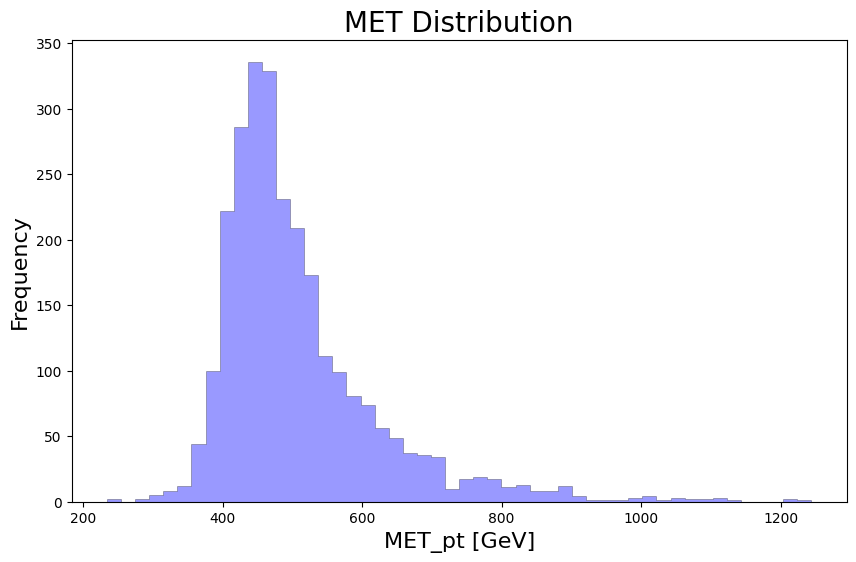

In [18]:
# Create the MET histogram 
plt.figure(figsize=(10, 6))
plt.hist(selected_met_pt, bins=50, color='blue', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('MET Distribution', fontsize=20)  
plt.xlabel('MET_pt [GeV]', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.grid(False)
plt.show()

Integral of the histogram: 2679.0


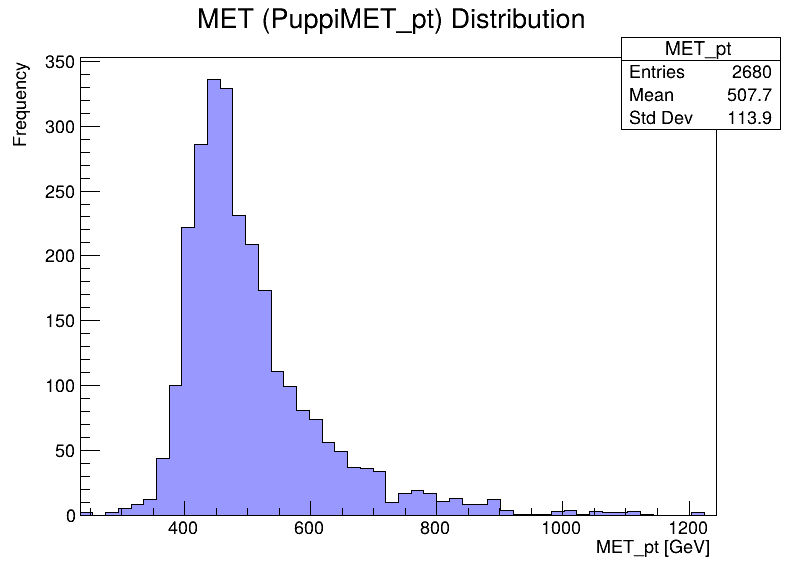

In [19]:
n_bins = 50
min_value = min(selected_met_pt)
max_value = max(selected_met_pt)
hist = ROOT.TH1F("MET_pt", "MET (PuppiMET_pt) Distribution", n_bins, min_value, max_value)

for value in selected_met_pt:
    hist.Fill(value)

canvas = ROOT.TCanvas("canvas", "MET Distribution", 800, 600)

hist.SetFillColorAlpha(ROOT.kBlue, 0.4) 
hist.SetLineColor(ROOT.kBlack) 
hist.SetTitle("MET (PuppiMET_pt) Distribution")
hist.GetXaxis().SetTitle("MET_pt [GeV]")
hist.GetYaxis().SetTitle("Frequency")
hist.Draw("HIST")

integral = hist.Integral()
print(f"Integral of the histogram: {integral}")

canvas.Draw()

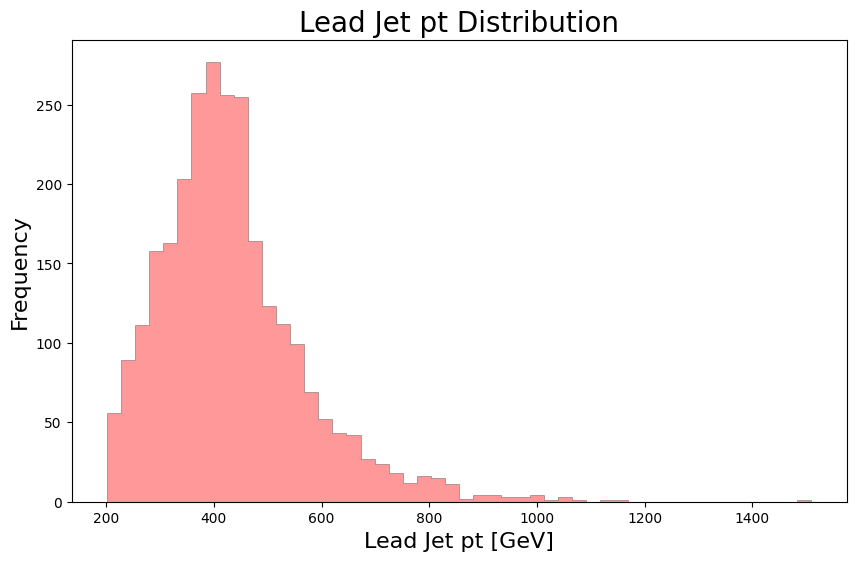

In [20]:
# Create the Lead Jet pt histogram
plt.figure(figsize=(10, 6))
plt.hist(selected_lead_jet_pt, bins=50, color='red', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Lead Jet pt Distribution', fontsize=20)  
plt.xlabel('Lead Jet pt [GeV]', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.grid(False)
plt.show()

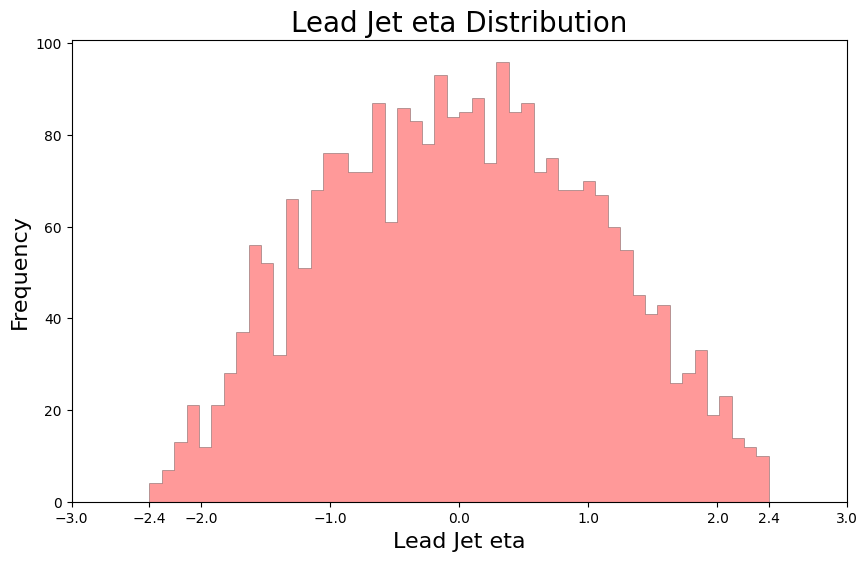

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(selected_lead_jet_eta, bins=50, color='red', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')  
plt.xticks(list(plt.xticks()[0]) + [-2.4, 2.4])
plt.title('Lead Jet eta Distribution', fontsize=20)  
plt.xlabel('Lead Jet eta', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.grid(False)
plt.show()

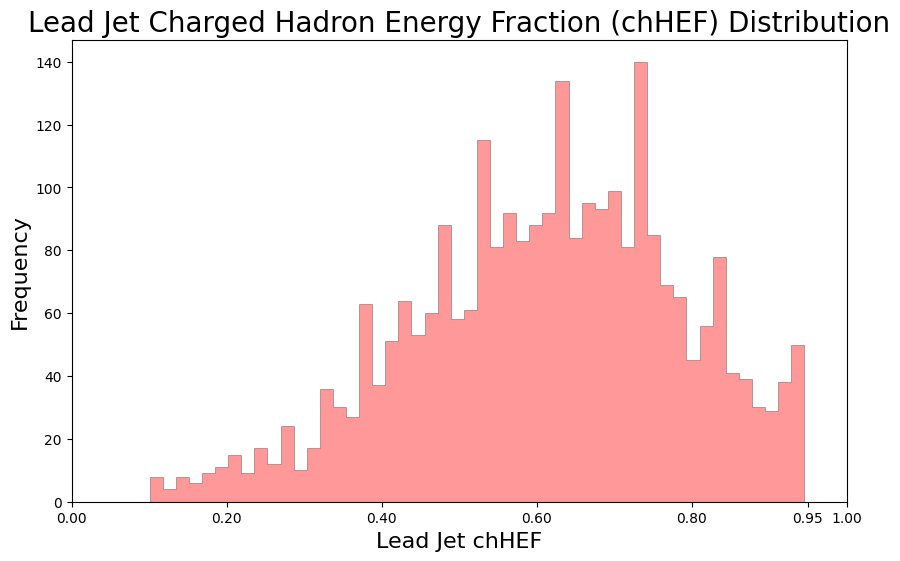

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(selected_lead_jet_ch_hef, bins=50, color='red', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.xticks(list(plt.xticks()[0]) + [0.95])
plt.title('Lead Jet Charged Hadron Energy Fraction (chHEF) Distribution', fontsize=20)  
plt.xlabel('Lead Jet chHEF', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.grid(False)
plt.show()

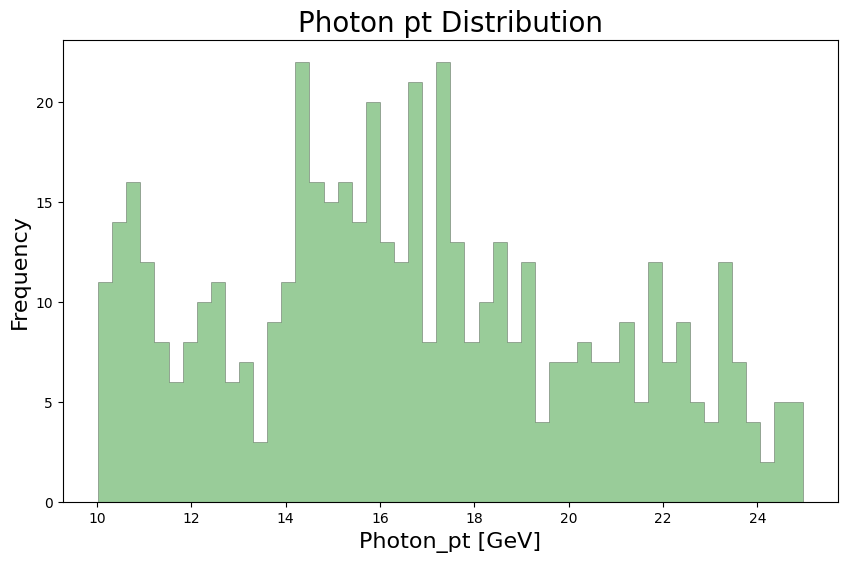

In [23]:
flatten_selected_photon_pt = np.hstack(selected_photon_pt)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_photon_pt, bins=50, color='green', alpha=0.4, edgecolor='black',linewidth=0.5, histtype='stepfilled')
plt.title('Photon pt Distribution', fontsize=20)
plt.xlabel('Photon_pt [GeV]', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False)
plt.show()

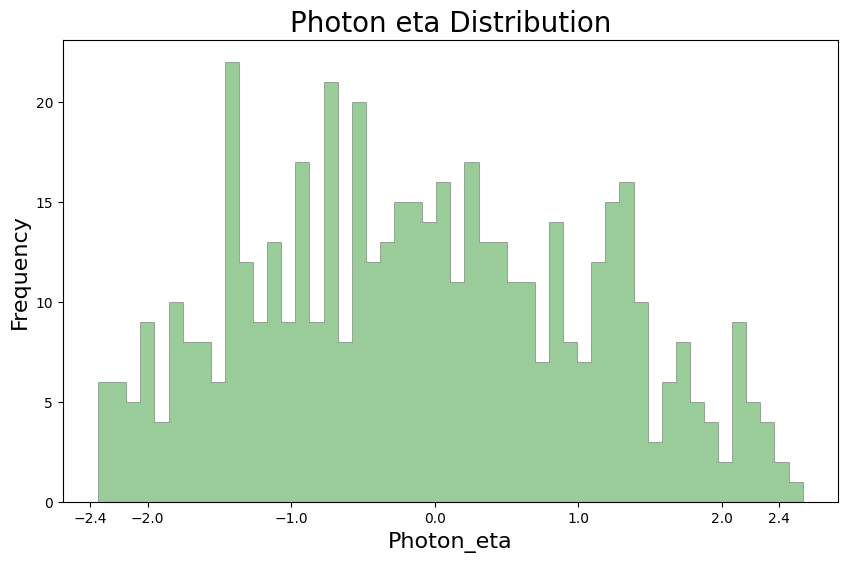

In [24]:
flatten_selected_photon_eta = np.hstack(selected_photon_eta)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_photon_eta, bins=50, color='green', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Photon eta Distribution', fontsize=20)
plt.xlabel('Photon_eta', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False)
plt.xticks([-2.4, -2, -1, 0, 1, 2, 2.4]) 
plt.show()

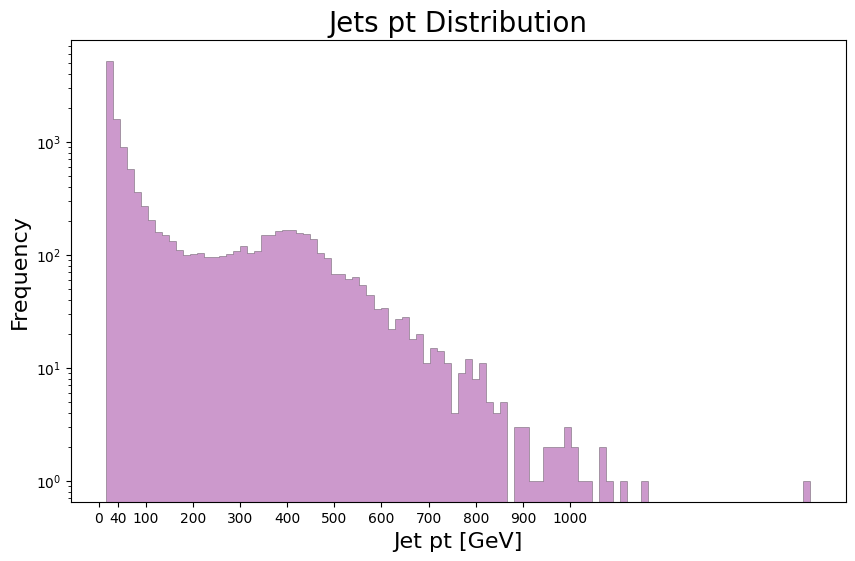

In [25]:
plt.figure(figsize=(10,6))
plt.hist(selected_jet_pt, bins=100, color='purple', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.xticks([0, 40, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])  
plt.yscale('log')
plt.title('Jets pt Distribution', fontsize=20)
plt.xlabel('Jet pt [GeV]', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False)
plt.show()

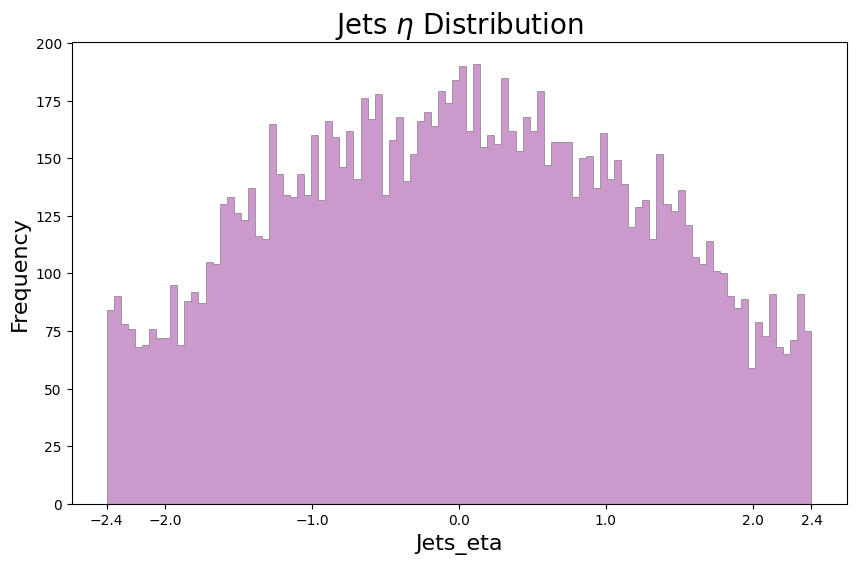

In [26]:
plt.figure(figsize=(10,6))
plt.hist(selected_jet_eta, bins=100, color='purple', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.xticks([-2.4, -2, -1, 0, 1, 2, 2.4])  
plt.title('Jets $\eta$ Distribution', fontsize=20)
plt.xlabel('Jets_eta', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False)
plt.show()

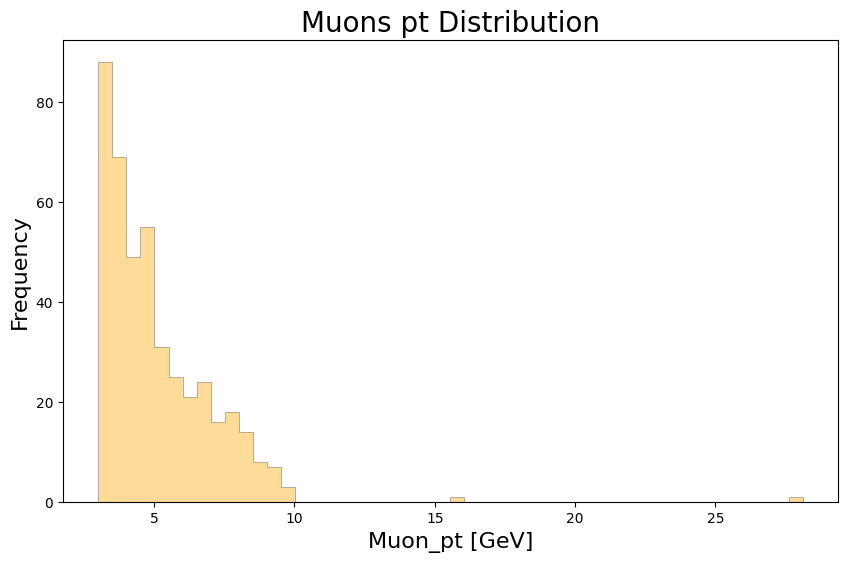

In [27]:
flatten_selected_muon_pt = np.hstack(selected_muon_pt)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_muon_pt, bins=50, color='orange', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Muons pt Distribution', fontsize=20)
plt.xlabel('Muon_pt [GeV]', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False)
plt.show()

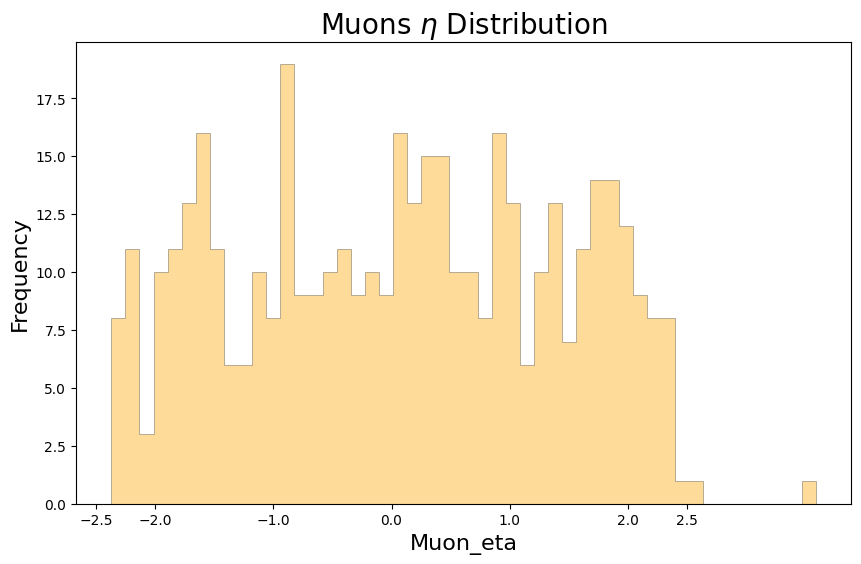

In [28]:
flatten_selected_muon_eta = np.hstack(selected_muon_eta)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_muon_eta, bins=50, color='orange', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Muons $\eta$ Distribution', fontsize=20)
plt.xlabel('Muon_eta', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks([-2.5, -2, -1, 0, 1, 2, 2.5]) 
plt.grid(False)
plt.show()

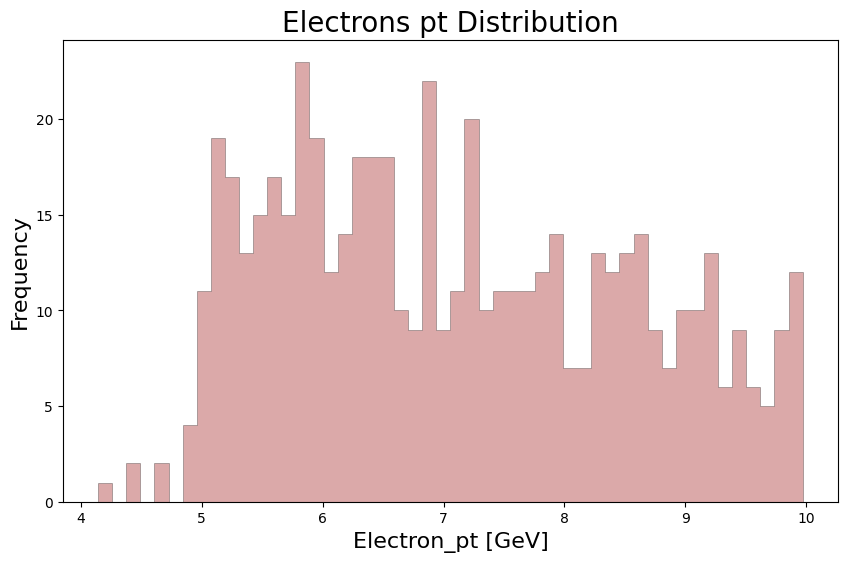

In [29]:
flatten_selected_electron_pt = np.hstack(selected_electron_pt)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_electron_pt, bins=50, color='brown', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Electrons pt Distribution', fontsize=20)
plt.xlabel('Electron_pt [GeV]', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False) 
plt.show()

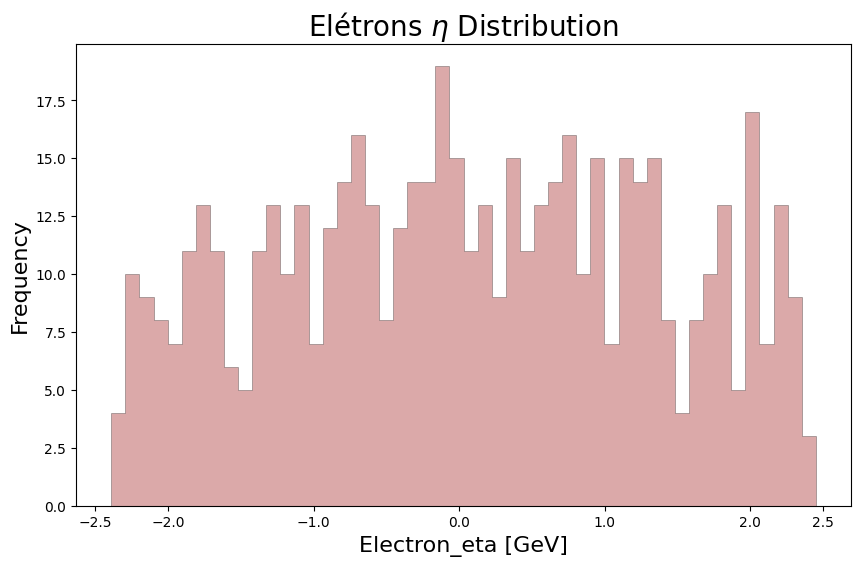

In [30]:
flatten_selected_electron_eta = np.hstack(selected_electron_eta)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_electron_eta, bins=50, color='brown', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Elétrons $\eta$ Distribution', fontsize=20)
plt.xlabel('Electron_eta [GeV]', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks([-2.5, -2, -1, 0, 1, 2, 2.5]) 
plt.grid(False) 
plt.show()

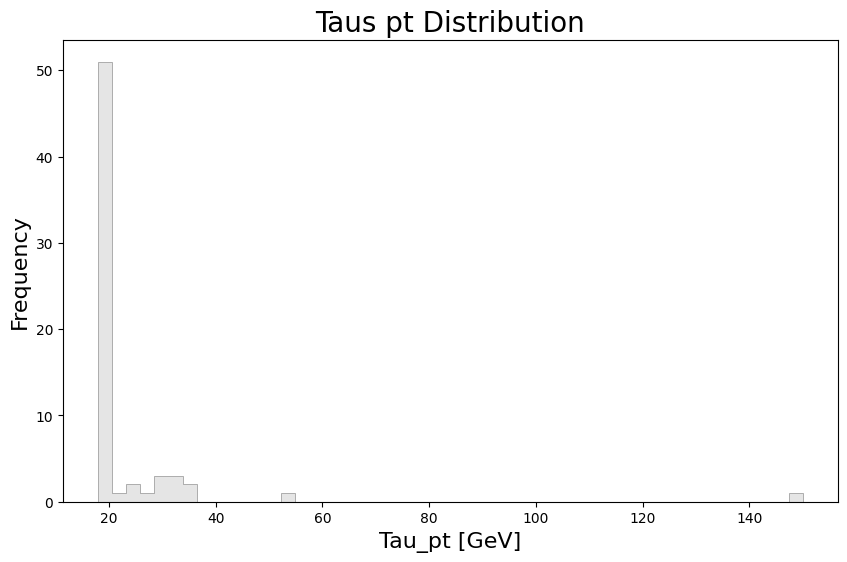

In [31]:
flatten_selected_tau_pt = np.hstack(selected_tau_pt)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_tau_pt, bins=50, color='silver', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Taus pt Distribution', fontsize=20)
plt.xlabel('Tau_pt [GeV]', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(False) 
plt.show()

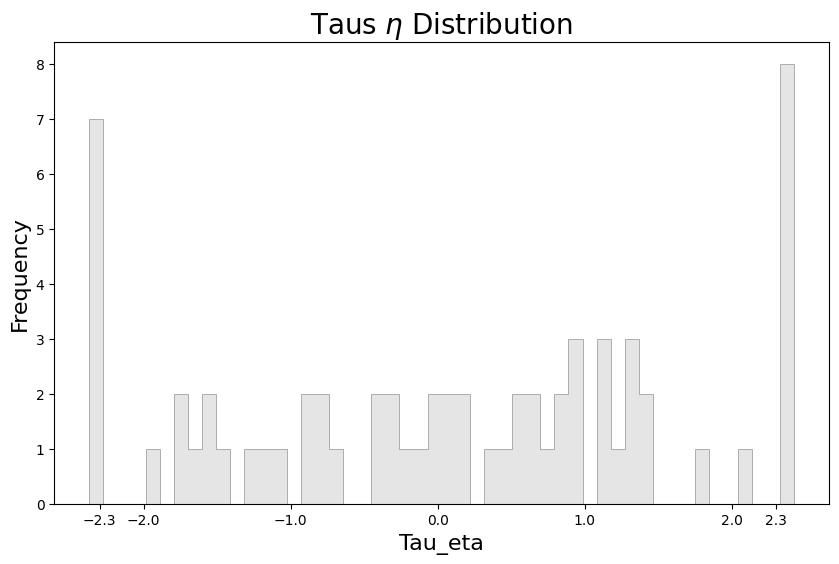

In [32]:
flatten_selected_tau_eta = np.hstack(selected_tau_eta)
plt.figure(figsize=(10,6))
plt.hist(flatten_selected_tau_eta, bins=50, color='silver', alpha=0.4, edgecolor='black', linewidth=0.5, histtype='stepfilled')
plt.title('Taus $\eta$ Distribution', fontsize=20)
plt.xlabel('Tau_eta', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks([-2.3, -2, -1, 0, 1, 2, 2.3]) 
plt.grid(False) 
plt.show()

In [33]:
# Create 4-vector objects for muons
muons = ak.zip(
    {"pt":  selected_muon_pt,           
     "eta": selected_muon_eta,         
     "phi": selected_muon_phi,        
     "mass": selected_muon_mass},     
    with_name="Momentum4D",                                             
)

# Create 4-vector objects for jets
jets = ak.zip(
    {"pt": selected_jet_pt,             
     "eta": selected_jet_eta,           
     "phi":  selected_jet_phi,           
     "mass": selected_jet_mass},        
    with_name="Momentum4D",                                             
)

# Create 4-vector objects for MET (missing transverse energy)
met = ak.zip(
    {"pt": selected_met_pt,                                       
     "eta": selected_met_eta,                                    
     "phi": selected_met_phi,                                     
     "mass": 0},                                                         
    with_name="Momentum4D",                                              
)


# Create 4-vector objects for electrons
electrons = ak.zip(
    {"pt": selected_electron_pt,                                       
     "eta": selected_electron_eta,                                    
     "phi": selected_electron_phi,                                     
     "mass": selected_electron_mass},                                 
    with_name="Momentum4D",                                              
)

# Create 4-vector objects for taus
taus = ak.zip(
    {"pt": selected_tau_pt,                                       
     "eta": selected_tau_eta,                                    
     "phi": selected_tau_phi,                                     
     "mass": selected_tau_mass},                                 
    with_name="Momentum4D",                                              
)

# Create 4-vector objects for photons
photons = ak.zip(
    {"pt": selected_photon_pt,                                       
     "eta": selected_photon_eta,                                    
     "phi": selected_photon_phi,                                     
     "mass": selected_photon_mass},                                 
    with_name="Momentum4D",                                              
)

# Create 4-vector object for the lead jet (first jet)
lead_jet = ak.zip(
    {"pt": selected_lead_jet_pt,
     "eta": selected_lead_jet_eta,
     "phi": selected_lead_jet_phi,
     "mass": selected_lead_jet_mass},
    with_name="Momentum4D",
)

 
lead_jet2 = ak.zip(
    {"pt": selected_lead_jet2_pt,
     "eta": selected_lead_jet2_eta,
     "phi": selected_lead_jet2_phi,
     "mass": selected_lead_jet2_mass},
    with_name="Momentum4D",
)
    
lead_jet3 = ak.zip(
    {"pt": selected_lead_jet3_pt,
     "eta": selected_lead_jet3_eta,
     "phi": selected_lead_jet3_phi,
     "mass": selected_lead_jet3_mass},
    with_name="Momentum4D",
)

lead_jet4 = ak.zip(
    {"pt": selected_lead_jet4_pt,
     "eta": selected_lead_jet4_eta,
     "phi": selected_lead_jet4_phi,
     "mass": selected_lead_jet4_mass},
    with_name="Momentum4D",
)

In [36]:
def salvar_file(dataset_name='default', IS_DATA=False):
    """
    Function to process and save real data or Monte Carlo in CSV file.
    Parameters:
    - dataset_name: Name of the dataset (string)
    - IS_DATA: Boolean that indicates whether it is given real (True) or Monte Carlo (False)
    """

    # Initialize variables
    N_gen = -999
    pileup = -999
    gw_pos = -999
    gw_neg = -999

    pileup_per_candidate = None

    tmpval_events = np.ones(len(selected_met_pt))
    tmpval = np.ones_like(selected_met_pt) 

    # Conditional for Monte Carlo or real data
    if not IS_DATA:
        # If it is Monte Carlo, calculate gen_weights and pileup 
        gen_weights_per_candidate = tmpval * gen_weights_selected
        pileup_per_candidate = tmpval * pileup_selected

        # Calcular gw_pos, gw_neg e N_gen
        gw_pos = ak.count(gen_weights[gen_weights > 0])
        gw_neg = ak.count(gen_weights[gen_weights < 0])
        N_gen = gw_pos - gw_neg
    else:
        # Se for dado real, usar valores placeholders
        pileup_per_candidate = -999 * tmpval
        gen_weights_per_candidate = -999 * tmpval

    # Create the dictionary with the results
    mydict = {}
    mydict['pileup'] = pileup_per_candidate
    mydict['weight'] = gen_weights_per_candidate
    mydict['N_gen'] = N_gen * tmpval_events
    mydict['gw_pos'] = gw_pos * tmpval_events
    mydict['gw_neg'] = gw_neg * tmpval_events

    # Muons
    mydict['muon_pt'] = selected_muon_pt
    mydict['muon_eta'] = selected_muon_eta
    mydict['muon_phi'] = selected_muon_phi
    mydict['muon_mass'] = selected_muon_mass

    # MET
    mydict['met_pt'] = selected_met_pt
    mydict['met_phi'] = selected_met_phi
    mydict['met_eta'] = selected_met_eta

    # CaloMET e MET PF
    mydict['calo_met_pt'] = selected_calo_met_pt
    mydict['met_pt_pf'] = selected_met_pt_pf
    mydict['met_phi_pf'] = selected_met_phi_pf

    # Electrons
    mydict['electron_pt'] = selected_electron_pt
    mydict['electron_eta'] = selected_electron_eta
    mydict['electron_phi'] = selected_electron_phi
    mydict['electron_mass'] = selected_electron_mass

    # Taus
    mydict['tau_pt'] = selected_tau_pt
    mydict['tau_eta'] = selected_tau_eta
    mydict['tau_phi'] = selected_tau_phi
    mydict['tau_mass'] = selected_tau_mass

    # Photons
    mydict['photon_pt'] = selected_photon_pt
    mydict['photon_eta'] = selected_photon_eta
    mydict['photon_phi'] = selected_photon_phi
    mydict['photon_mass'] = selected_photon_mass

    # Lead Jet 1
    mydict['lead_jet_pt'] = selected_lead_jet_pt
    mydict['lead_jet_eta'] = selected_lead_jet_eta
    mydict['lead_jet_phi'] = selected_lead_jet_phi
    mydict['lead_jet_mass'] = selected_lead_jet_mass
    mydict['lead_jet_btag_csvv2'] = selected_lead_jet_btag_csvv2
    mydict['lead_jet_ch_hef'] = selected_lead_jet_ch_hef

    # Lead Jet 2
    mydict['lead_jet2_pt'] = selected_lead_jet2_pt
    mydict['lead_jet2_eta'] = selected_lead_jet2_eta
    mydict['lead_jet2_phi'] = selected_lead_jet2_phi
    mydict['lead_jet2_mass'] = selected_lead_jet2_mass
    mydict['lead_jet2_btag_csvv2'] = selected_lead_jet2_btag_csvv2
    mydict['lead_jet2_ch_hef'] = selected_lead_jet2_ch_hef

    # Lead Jet 3
    mydict['lead_jet3_pt'] = selected_lead_jet3_pt
    mydict['lead_jet3_eta'] = selected_lead_jet3_eta
    mydict['lead_jet3_phi'] = selected_lead_jet3_phi
    mydict['lead_jet3_mass'] = selected_lead_jet3_mass
    mydict['lead_jet3_btag_csvv2'] = selected_lead_jet3_btag_csvv2
    mydict['lead_jet3_ch_hef'] = selected_lead_jet3_ch_hef

    # Lead Jet 4
    mydict['lead_jet4_pt'] = selected_lead_jet4_pt
    mydict['lead_jet4_eta'] = selected_lead_jet4_eta
    mydict['lead_jet4_phi'] = selected_lead_jet4_phi
    mydict['lead_jet4_mass'] = selected_lead_jet4_mass
    mydict['lead_jet4_btag_csvv2'] = selected_lead_jet4_btag_csvv2
    mydict['lead_jet4_ch_hef'] = selected_lead_jet4_ch_hef

    # Convert the dictionary into a DataFrame pandas
    df = pd.DataFrame.from_dict(mydict)

    # Save the DataFrame as a CSV file, using the name provided by the user
    df.to_csv(f"{dataset_name}.csv", index=False)

    print(f"Dados processados e salvos como {dataset_name}.csv")

In [37]:
# Call the function by passing the dataset name and whether it is given or Monte Carlo
salvar_file(dataset_name='Z2JetsToNuNu_400ToInf', IS_DATA=False)

Dados processados e salvos como Z2JetsToNuNu_400ToInf.csv
